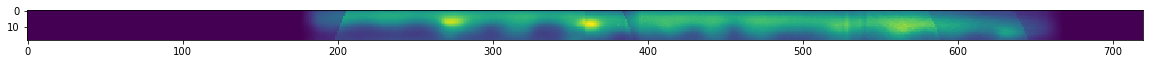

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
data = np.flip(fits.open("fits/2017may_2.12_neb.fits")[0].data, 0)
plt.figure(figsize=(20, 1))
plt.imshow(data)
plt.show()

In [2]:
from copy import deepcopy

def rollingMedian(data, numWindows=10):
    rollingMed = deepcopy(data)
    windowSize = int(len(data)/numWindows)
    for i in range(0, len(data), windowSize):
        if i+windowSize > len(data):
            rollingMed[i:] = np.full(len(data)-i, np.median(data[i:]))
        else:
            rollingMed[i:i+windowSize] = np.full(windowSize, np.median(data[i:i+windowSize]))
    return rollingMed

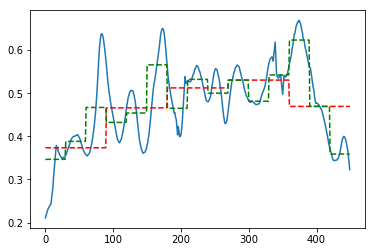

In [41]:
avg = np.mean(data, 0)[190:640]
lon = np.arange(len(avg))
plt.plot(lon, avg)
plt.plot(lon, rollingMedian(avg, numWindows=5), color='red', linestyle='--')
plt.plot(lon, rollingMedian(avg, numWindows=15), color='green', linestyle='--')
plt.show()

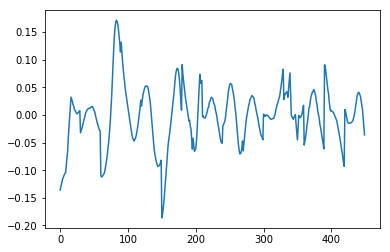

In [42]:
avg_detrended = avg-rollingMedian(avg, numWindows=15)
plt.plot(lon, avg_detrended)
plt.show()

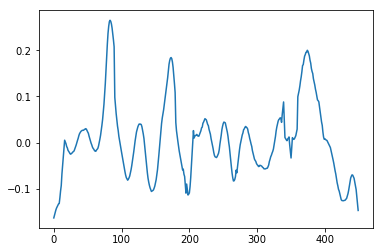

In [80]:
avg_detrended = avg-rollingMedian(avg, numWindows=5)
avg_detrended -= np.median(avg_detrended)
plt.plot(lon, avg_detrended)
plt.show()

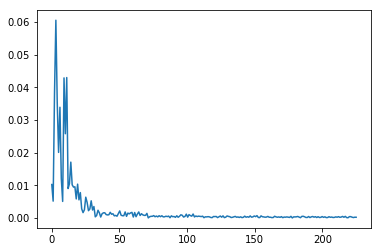

In [82]:
N = len(avg_detrended)
T = 1.0/N
x = np.linspace(0.0, N * T, N)
fourier = fft(avg_detrended)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(fourier[0:N//2]))
plt.show()

In [87]:
#wave power in descending order
np.flip(np.argsort(fourier[0:N//2]))

array([ 11,   6,   5,   0,  16,  10,   8,  26,  21,  31,  28,  56,  61,
        22, 101,  66,  57,  23,  37,  96,  41,  52, 151,  81,  46,  77,
        51,  92, 142, 106,  33, 146, 121,  76, 186, 126,  86, 105,  97,
       191, 156,  82, 116, 147, 179, 136, 131,  91, 201, 219, 223, 196,
        65, 137,  36, 214, 141, 166,  48, 188, 133, 184, 172, 192, 117,
        85, 167, 216, 138, 183,  60, 199,  87, 211, 171, 111, 181,  73,
       207, 174, 161, 162, 122, 218, 222, 206, 224, 177, 114, 221, 197,
       203, 158, 204, 110,  93, 176, 112, 212, 209,  71, 107, 202, 152,
       217, 118, 182, 132, 129, 109, 198, 102, 113, 208, 170, 140, 193,
       127, 194, 195, 153, 163, 187, 144, 157,  98, 160, 190,  68,  62,
       175, 178, 168, 143, 159, 130, 149, 200, 134, 145, 205, 210, 213,
       215, 135, 125, 173, 169, 128, 154, 189, 108,  83, 100, 119, 220,
       164, 115,  69, 124,  78,  80, 123, 155,  89, 165,  72,  32, 148,
        88, 139,  70,  84, 180,  40, 120,  47, 185, 150,  64,  9

In [89]:
#wave powers corrected for observation width
720 / N * np.flip(np.argsort(fourier[0:N//2]))

array([ 17.6,   9.6,   8. ,   0. ,  25.6,  16. ,  12.8,  41.6,  33.6,
        49.6,  44.8,  89.6,  97.6,  35.2, 161.6, 105.6,  91.2,  36.8,
        59.2, 153.6,  65.6,  83.2, 241.6, 129.6,  73.6, 123.2,  81.6,
       147.2, 227.2, 169.6,  52.8, 233.6, 193.6, 121.6, 297.6, 201.6,
       137.6, 168. , 155.2, 305.6, 249.6, 131.2, 185.6, 235.2, 286.4,
       217.6, 209.6, 145.6, 321.6, 350.4, 356.8, 313.6, 104. , 219.2,
        57.6, 342.4, 225.6, 265.6,  76.8, 300.8, 212.8, 294.4, 275.2,
       307.2, 187.2, 136. , 267.2, 345.6, 220.8, 292.8,  96. , 318.4,
       139.2, 337.6, 273.6, 177.6, 289.6, 116.8, 331.2, 278.4, 257.6,
       259.2, 195.2, 348.8, 355.2, 329.6, 358.4, 283.2, 182.4, 353.6,
       315.2, 324.8, 252.8, 326.4, 176. , 148.8, 281.6, 179.2, 339.2,
       334.4, 113.6, 171.2, 323.2, 243.2, 347.2, 188.8, 291.2, 211.2,
       206.4, 174.4, 316.8, 163.2, 180.8, 332.8, 272. , 224. , 308.8,
       203.2, 310.4, 312. , 244.8, 260.8, 299.2, 230.4, 251.2, 156.8,
       256. , 304. ,